In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data2018=pd.read_csv("england-premier-league-teams-2017-to-2018-stats.csv")
data2019=pd.read_csv("england-premier-league-teams-2018-to-2019-stats.csv")
data2020=pd.read_csv("england-premier-league-teams-2019-to-2020-stats.csv")
data2021=pd.read_csv("england-premier-league-teams-2020-to-2021-stats.csv")
data2022=pd.read_csv("england-premier-league-teams-2021-to-2022-stats.csv")

In [3]:
data=pd.concat([data2018,data2019,data2020,data2021,data2022])
data["points"]=3*data["wins"]+1*data["draws"]
print(data.columns)

Index(['team_name', 'common_name', 'season', 'country', 'matches_played',
       'matches_played_home', 'matches_played_away', 'suspended_matches',
       'wins', 'wins_home',
       ...
       'goals_conceded_min_71_to_80', 'goals_conceded_min_81_to_90',
       'draw_percentage_overall', 'draw_percentage_home',
       'draw_percentage_away', 'loss_percentage_ovearll',
       'loss_percentage_home', 'loss_percentage_away',
       'over145_corners_percentage', 'points'],
      dtype='object', length=294)


In [4]:
top_4 = data[data["league_position"]<=4]
non_top_4 = data[data["league_position"]>4]
top_4

,team_name,common_name,season,country,matches_played,matches_played_home,matches_played_away,suspended_matches,wins,wins_home,...,goals_conceded_min_71_to_80,goals_conceded_min_81_to_90,draw_percentage_overall,draw_percentage_home,draw_percentage_away,loss_percentage_ovearll,loss_percentage_home,loss_percentage_away,over145_corners_percentage,points
1,Tottenham Hotspur FC,Tottenham Hotspur,2017/2018,England,38,19,19,0,23,13,...,4,8,21,21,21,18,11,26,13,77
2,Manchester City FC,Manchester City,2017/2018,England,38,19,19,0,32,16,...,1,4,11,11,11,5,5,5,8,100
11,Manchester United FC,Manchester United,2017/2018,England,38,19,19,0,25,15,...,3,2,16,11,21,18,11,26,8,81
12,Liverpool FC,Liverpool,2017/2018,England,38,19,19,0,21,12,...,4,8,32,37,26,13,0,26,5,75
1,Tottenham Hotspur FC,Tottenham Hotspur,2018/2019,England,38,19,19,0,23,12,...,8,10,5,11,0,34,26,42,11,71
2,Manchester City FC,Manchester City,2018/2019,England,38,19,19,0,32,18,...,2,3,5,0,11,11,5,16,5,98
10,Liverpool FC,Liverpool,2018/2019,England,38,19,19,0,30,17,...,3,4,18,11,26,3,0,5,5,97
11,Chelsea FC,Chelsea,2018/2019,England,38,19,19,0,21,12,...,4,3,24,32,16,21,5,37,3,72
2,Manchester City FC,Manchester City,2019/2020,England,38,19,19,0,26,15,...,4,9,8,11,5,24,11,37,24,81
9,Manchester United FC,Manchester United,2019/2020,England,38,19,19,0,18,10,...,1,8,32,37,26,21,11,32,18,66


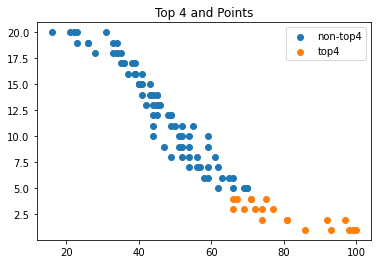

In [5]:
plt.scatter(non_top_4['points'],non_top_4["league_position"], label=f'non-top4')
plt.scatter(top_4['points'], top_4["league_position"], label=f'top4')
plt.rcParams.update({'figure.figsize':(6.4,4.8), 'figure.dpi':100})
plt.title('Top 4 and Points')
plt.legend()
plt.show()

The problem of interest can be formulated as a classification problems where it is predicted that a team will finish top 4 (positives) if they reach at least a certain threshold of points. It is clear from the graph that a good threshold should be a little less than 70 points, we can build a contingency table that serves as a confusion matrix to evaluate each value.

In [6]:
data['Top4']= ['not_Top4' if i>4 else 'Top4' for i in data['league_position']]
data['67pts']= ['O67' if i>=67 else 'U67' for i in data['points']]

False positives occur when the team scored over 67 points ("O67") but did not qualify for the Champions League ("Not Top4"), while false negatives are the cases where the team scored under 67 points ("U67") but still ranked top 4. 

In [7]:
data_crosstab = pd.crosstab(data['Top4'],data['67pts'],rownames=['Actual'], colnames=['Predicted'])
data_crosstab

Predicted,O67,U67
Actual,,
Top4,18,2
not_Top4,3,77


The Thresholds of 66 and 67 points both return an accuracy of 95%, but the threshold of 67 was chosen because it had more balance between false negatives and false positives: the confusion matrix indicates a false positive rate of 3.75% and a true positive rate of 90%. 

In [8]:
data_def=pd.read_csv("avgDefStats.csv")
data_def

,Name,Win rate,Loss rate,Team,Games Played,Average Tackles,Average Errors leading to a goal,Average Blocked shots,Average Interceptions,Average Clearances,Average Recoveries,Average Duels won,Average Duels lost,Average Goals,Average Passes,Average Accurate long balls,Average Yellow cards,Average Red cards,Average Fouls
0,Lloyd Kelly,0.333333,0.541667,Bournemouth,24,1.125000,0.041667,0.125000,1.083333,3.375000,4.708333,3.083333,2.583333,0.000000,37.500000,2.250000,0.208333,0.000000,0.708333
1,Chris Mepham,0.229167,0.562500,Bournemouth,48,1.312500,0.041667,0.041667,1.208333,5.187500,3.583333,4.020833,2.708333,0.020833,36.416667,1.562500,0.187500,0.000000,0.687500
2,Adam Smith,0.310345,0.459770,Bournemouth,174,1.959770,0.005747,0.120690,1.178161,1.948276,4.091954,5.275862,4.413793,0.028736,33.390805,1.195402,0.218391,0.005747,0.988506
3,Jack Stacey,0.214286,0.571429,Bournemouth,28,0.928571,0.000000,0.000000,0.821429,2.357143,3.678571,3.107143,2.857143,0.000000,24.785714,1.071429,0.142857,0.000000,0.500000
4,Jordan Zemura,0.210526,0.473684,Bournemouth,19,2.052632,0.000000,0.052632,0.842105,1.368421,4.105263,4.105263,4.105263,0.000000,24.052632,0.578947,0.052632,0.000000,0.894737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,Toti,0.500000,0.285714,Wolverhampton Wanderers,14,1.428571,0.000000,0.071429,1.142857,3.357143,3.571429,4.357143,2.642857,0.000000,37.000000,1.285714,0.285714,0.000000,0.571429
178,Nathan Collins,0.250000,0.500000,Wolverhampton Wanderers,40,1.550000,0.000000,0.100000,1.125000,3.800000,5.375000,4.475000,2.975000,0.050000,40.775000,2.675000,0.100000,0.050000,0.850000
179,Hugo Bueno,0.294118,0.470588,Wolverhampton Wanderers,17,1.647059,0.000000,0.117647,0.529412,1.470588,4.470588,3.117647,2.941176,0.000000,24.352941,0.176471,0.058824,0.000000,0.294118
180,Dexter Lembikisa,0.000000,1.000000,Wolverhampton Wanderers,1,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000


In [25]:
def build_data(data):
    data = data[data["Games Played"] >= (data["Games Played"].mean()) / 4]
    data = data.copy()
    data.loc[:, "avg_points"] = 38 * (3 * data["Win rate"] + (1 - data["Win rate"] - data["Loss rate"]))
    data["pred_top4"] = [1 if i >= 67 else 0 for i in data["avg_points"]]
    return data

In [26]:
def get_correlation(df):
    corr_matrix = df.corr(numeric_only=True)
    corr_points = corr_matrix.loc["avg_points"]
    corr_top4 = corr_matrix.loc["pred_top4"]
    df_corr = pd.concat([corr_points, corr_top4], axis=1)
    df_corr.columns = ["Correlation with Points Gained", "Correlation with Predicted Top 4"]
    return df_corr

                                  Correlation with Points Gained  \
Win rate                                                0.988746   
Loss rate                                              -0.943642   
Games Played                                            0.186694   
Average Tackles                                        -0.113456   
Average Errors leading to a goal                        0.076240   
Average Blocked shots                                   0.173947   
Average Interceptions                                  -0.151799   
Average Clearances                                     -0.156897   
Average Recoveries                                      0.130002   
Average Duels won                                      -0.072917   
Average Duels lost                                     -0.148908   
Average Goals                                           0.121141   
Average Passes                                          0.555579   
Average Accurate long balls                     

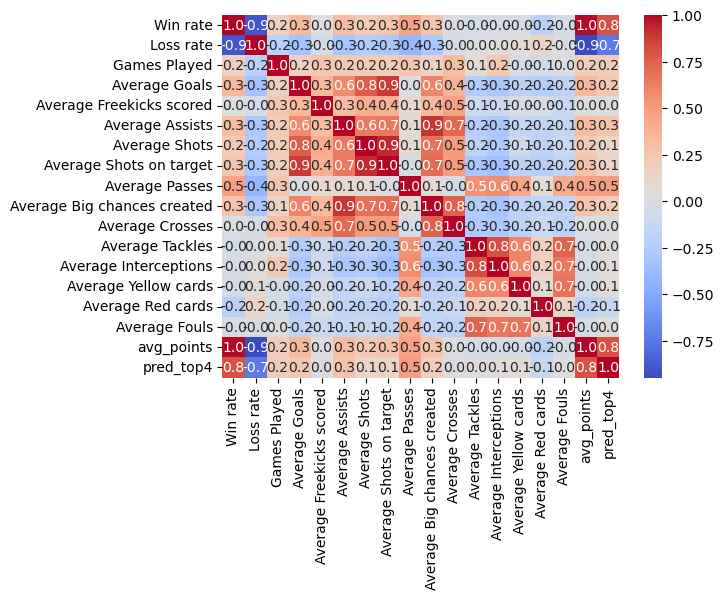

In [32]:
data_def=pd.read_csv("avgDefStats.csv")
data_def_clean=build_data(data_def)
corr_def=get_correlation(data_def_clean)
corr_matrix_def=data_def_clean.corr(numeric_only=True)
sns.heatmap(corr_matrix_mid, annot=True, cmap='coolwarm', fmt='.1f')
print(corr_def)

<AxesSubplot:>

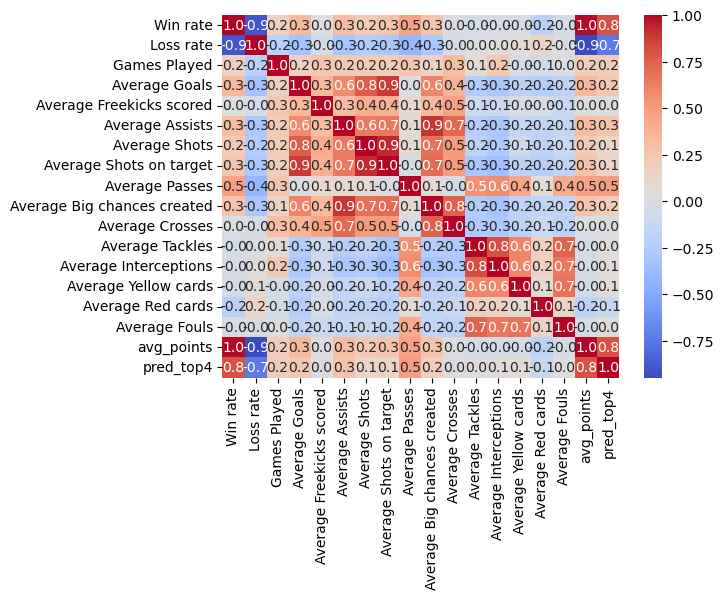

In [31]:
data_mid=pd.read_csv("avgMidStats.csv")
data_mid_clean=build_data(data_mid)
corr_mid=get_correlation(data_mid_clean)
corr_matrix_mid=data_mid_clean.corr(numeric_only=True)
sns.heatmap(corr_matrix_mid, annot=True, cmap='coolwarm', fmt='.1f')

,Correlation with Points Gained,Correlation with Predicted Top 4
Win rate,0.991788,0.773225
Loss rate,-0.955786,-0.738171
Games Played,0.323749,0.338046
Average Goals,0.500640,0.534592
Average Headed goals,0.213492,0.203382
Average Penalties scored,0.275135,0.268370
Average Freekicks scored,-0.007598,0.159749
Average Assists,0.454639,0.491676
Average Shots,0.417633,0.466338
Average Shots on target,0.466356,0.511832


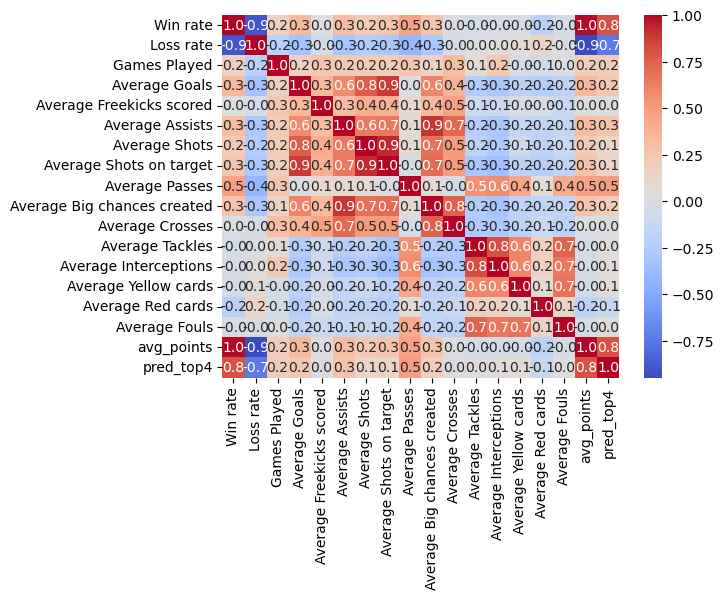

In [35]:
data_fwd=pd.read_csv("avgFwdStats.csv")
data_fwd_clean=build_data(data_fwd)
corr_fwd=get_correlation(data_fwd_clean)
corr_matrix_fwd=data_fwd_clean.corr(numeric_only=True)
sns.heatmap(corr_matrix_mid, annot=True, cmap='coolwarm', fmt='.1f')
corr_fwd

,Correlation with Points Gained,Correlation with Predicted Top 4
Win rate,0.989166,0.790291
Loss rate,-0.952431,-0.771514
Games Played,0.296191,0.272572
Average Saves,-0.649598,-0.623820
Average Penalties saved,-0.016757,-0.021091
Average Clean sheets,0.900136,0.702380
Average Goals conceded,-0.851060,-0.656478
Average Errors leading to a goal,0.075088,0.001488
Average Passes,-0.075139,-0.164367
Average Accurate long balls,-0.434242,-0.446233


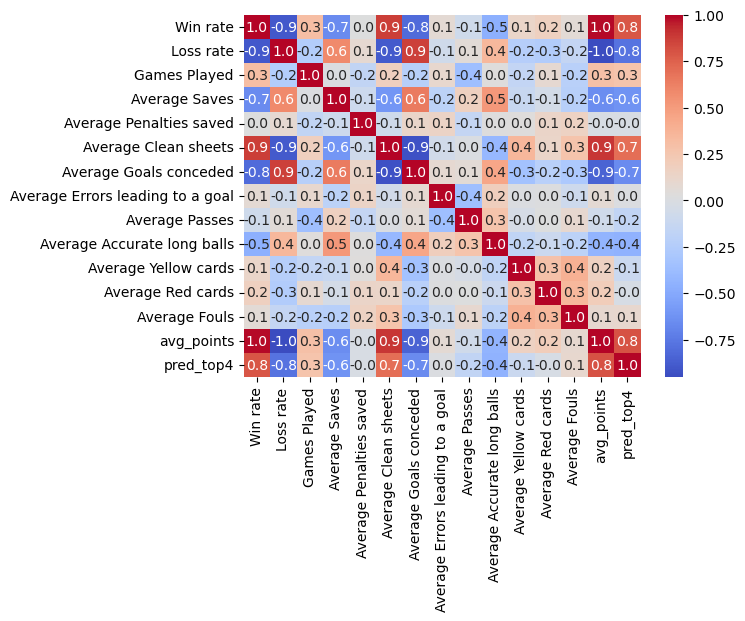

In [37]:
data_gk=pd.read_csv("avgGKStats.csv")
data_gk_clean=build_data(data_gk)
corr_gk=get_correlation(data_gk_clean)
corr_matrix_gk=data_gk_clean.corr(numeric_only=True)
sns.heatmap(corr_matrix_gk, annot=True, cmap='coolwarm', fmt='.1f')
corr_gk

In [51]:
#NOTE ON AVERAGE SAVES: GOOD EXAMPLE OF CORRELATION BUT NOT CAUSATION BECAUSE OF COURSE SAVING A GOAL DOES NOT AFFECT
#NEGATIVELY THE CHANCES OF A TEAM OF MAKING TOP 4 BUT STRONGER TEAMS HAVE BETTER DEFENCE AND THEY CONCEDE LESS SHOTS. 
#P-VALUE ANALYSIS 

In [61]:
def pvalue_analysis(data):
    stat = []
    p_values = []
    columns = [col for col in data.columns if col not in ['Name', 'Win rate', 'Loss rate', 'Team', 'avg_points', 'pred_top4']]
    for col in columns:
        top4 = data[data['pred_top4'] == 1][col].array
        non_top4 = data[data['pred_top4'] == 0][col].array
        p = stats.ttest_ind(a=top4, b=non_top4, equal_var=True).pvalue
        stat.append(col)
        p_values.append(p)

    d = {'stats':stat,'p-value':p_values}
    p_values = pd.DataFrame(d).sort_values('p-value')

    desirable_stats = p_values[p_values['p-value']<0.05]
    sig_diff_features = desirable_stats['stats'].to_list()

    return desirable_stats

In [62]:
desirable_stats_def=pvalue_analysis(data_def_clean)
desirable_stats_def

,stats,p-value
10,Average Passes,4.4036067657678774e-08
8,Average Duels lost,0.001438838124437852
7,Average Duels won,0.01263738526704456
12,Average Yellow cards,0.015853562879250698
4,Average Interceptions,0.01769592355385208
11,Average Accurate long balls,0.02199157431670139
14,Average Fouls,0.02603916389347327


In [63]:
desirable_stats_mid=pvalue_analysis(data_mid_clean)
desirable_stats_mid

,stats,p-value
6,Average Passes,9.617196570970946e-10
3,Average Assists,0.0008013749195255877
1,Average Goals,0.004965654309920151
7,Average Big chances created,0.016543779760162584
0,Games Played,0.019719315845555332


In [64]:
desirable_stats_fwd=pvalue_analysis(data_fwd_clean)
desirable_stats_fwd

,stats,p-value
1,Average Goals,9.287319497852202e-07
7,Average Shots on target,3.1480123157928437e-06
5,Average Assists,8.642044348088708e-06
6,Average Shots,2.8184775630483966e-05
10,Average Passes,3.211502015887426e-05
11,Average Big chances created,0.00011421164476701145
9,Average Big chances missed,0.002318859579150915
0,Games Played,0.0032220383268582275
3,Average Penalties scored,0.020784083499431664
8,Average Hit woodworks,0.034898723586799574


In [65]:
desirable_stats_gk=pvalue_analysis(data_gk_clean)
desirable_stats_gk

,stats,p-value
3,Average Clean sheets,2.562843792587906e-06
4,Average Goals conceded,1.8486145246914508e-05
1,Average Saves,6.229900338398291e-05
7,Average Accurate long balls,0.00721161891681924
